Train: (87, 24)
Test: (90, 24)

=== Logistic ===
Accuracy: 0.9444444444444444
F1: 0.9443826473859844
Confusion Matrix:
 [[44  4]
 [ 1 41]]

=== MLP ===
Accuracy: 0.9666666666666667
F1: 0.9666295884315907
Confusion Matrix:
 [[45  3]
 [ 0 42]]


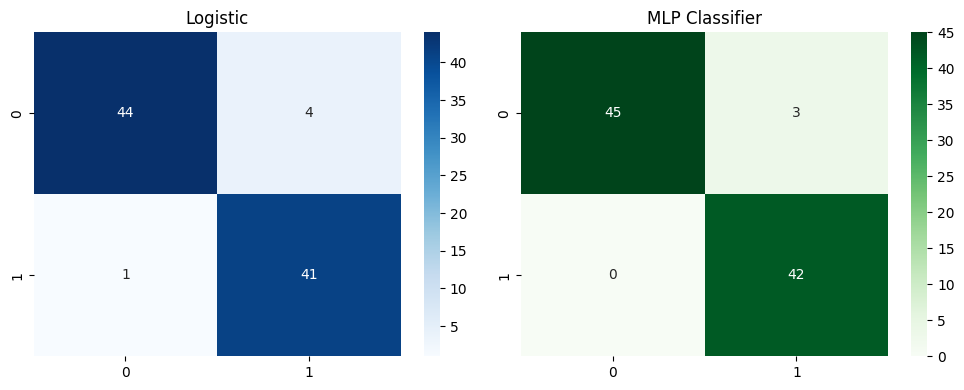

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# load data
acc1 = np.load("/content/drive/MyDrive/train_MSAccelerometer_OpenDoor_RubHands.npy")
gyro1 = np.load("/content/drive/MyDrive/train_MSGyroscope_OpenDoor_RubHands.npy")
label1 = np.load("/content/drive/MyDrive/train_labels_OpenDoor_RubHands.npy")

acc2 = np.load("/content/drive/MyDrive/test_MSAccelerometer_OpenDoor_RubHands.npy")
gyro2 = np.load("/content/drive/MyDrive/test_MSGyroscope_OpenDoor_RubHands.npy")
label2 = np.load("/content/drive/MyDrive/test_labels_OpenDoor_RubHands.npy")

# feature func
def feature(x):
    m = np.mean(x, axis=1)
    s = np.std(x, axis=1)
    mi = np.min(x, axis=1)
    ma = np.max(x, axis=1)
    return np.concatenate([m, s, mi, ma], axis=1)

# extract
X1 = np.concatenate([feature(acc1), feature(gyro1)], axis=1)
X2 = np.concatenate([feature(acc2), feature(gyro2)], axis=1)

print("Train:", X1.shape)
print("Test:", X2.shape)

# logistic model
m1 = LogisticRegression(max_iter=1000)
m1.fit(X1, label1)
pred1 = m1.predict(X2)

acc_log = accuracy_score(label2, pred1)
f1_log = f1_score(label2, pred1, average='macro')
conf1 = confusion_matrix(label2, pred1)

print("\n=== Logistic ===")
print("Accuracy:", acc_log)
print("F1:", f1_log)
print("Confusion Matrix:\n", conf1)

# mlp classifier
m2 = MLPClassifier(hidden_layer_sizes=(64, 25), max_iter=500, random_state=42)
m2.fit(X1, label1)
pred2 = m2.predict(X2)

acc_mlp = accuracy_score(label2, pred2)
f1_mlp = f1_score(label2, pred2, average='macro')
conf2 = confusion_matrix(label2, pred2)

print("\n=== MLP ===")
print("Accuracy:", acc_mlp)
print("F1:", f1_mlp)
print("Confusion Matrix:\n", conf2)

# plots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf1, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic")

plt.subplot(1, 2, 2)
sns.heatmap(conf2, annot=True, fmt='d', cmap='Greens')
plt.title("MLP Classifier")

plt.tight_layout()
plt.show()

**Project Report**

**1. Activity Recognition Project Report**

**1.1 Project Objective Statement**:

This project is made to classify human activities (Rub Hands & Open Doors) using Motion Sensors.

**1.2 Models Used**:

MLP Regressor : Using hidden neurons (2 layer 64 neurons and 25 neurons)
Logistic Regression: Basic linear classifier for baseline.

**1.3 DataSet**:

Accelerometer and gyroscope readings were processed to extract meaningful features and train machine learning models for activity recognition.

**1.4 Feature Extraction**:

From (X,Y,Z axis ) we took features : Mean , Std, Min, Max. So that makes it 3 * 4 = 12 features, 12 * 2 sensors = 24 features per sample


**1.5  Logistic Regression:**

Simple linear model trained with max_iter = 1000     
**Purpose:** Basic linear classifier for baseline.   

**Results:**    
**Accuracy:** 0.9444444444444444  
**F1:** 0.9443826473859844  
Confusion Matrix:

 [[44  4]

 [ 1 41]]

**1.6 MLP Classifier:**

Used MLPClassifier with two hidden layers (64, 25 neurons), max_iter = 500  
**Purpose**: Capture non-linear relationships

**Results**:  
**Accuracy:** 0.9666666666666667

**F1:** 0.9666295884315907

Confusion Matrix:

 [[45  3]

 [ 0 42]]

 **1.7 Conclusion**:

MLP Classifier showed better performance due to its ability to learn non-linear patterns. Logistic Regression served as a baseline.
